## Вступление

Всем привет! На сегодняшнем семинаре мы познакомимся с библиотекой **pytorch**. Он очень похож на numpy, с одним лишь отличием (на самом деле их больше, но сейчас мы поговорим про самое главное) -- pytorch может считать градиенты за вас. Таким образом вам не надо будет руками писать обратный проход в нейросетях. 

#### Семинар построен следующим образом:

1. Вспоминаем numpy и сравниваем операции в pytorch
2. Создаем тензоры в pytorch
3. Работаем с градиентами руками
4. Моя первая нейросеть 

### 1. Вспоминаем numpy и сравниваем операции в pytorch

Мы можем создавать матрицы, перемножать их, складывать, транспонировать и в целом совершать любые матричные операции

In [1]:
!pip install wandb --upgrade --quiet
import wandb

wandb.login()

/usr/lib/python3/dist-packages/secretstorage/dhcrypto.py:15: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/usr/lib/python3/dist-packages/secretstorage/util.py:19: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


wandb: Currently logged in as: kirili4ik (use `wandb login --relogin` to force relogin)


True

In [2]:
import numpy as np 
import torch
import torchvision
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F

from sklearn.datasets import load_boston
from tqdm.notebook import tqdm

%matplotlib inline

In [3]:
a = np.random.rand(5, 3) # создали случайную матрицу 
a

array([[0.28231596, 0.17180856, 0.83291583],
       [0.58534108, 0.58097739, 0.90343752],
       [0.2591466 , 0.62190822, 0.01288835],
       [0.79977185, 0.25799835, 0.7446957 ],
       [0.76749891, 0.94325262, 0.4406953 ]])

In [4]:
print("Проверили размеры : %s\n" % (a.shape,))

Проверили размеры : (5, 3)



In [5]:
print("Добавили 5 :\n%s\n" % (a + 5))

Добавили 5 :
[[5.28231596 5.17180856 5.83291583]
 [5.58534108 5.58097739 5.90343752]
 [5.2591466  5.62190822 5.01288835]
 [5.79977185 5.25799835 5.7446957 ]
 [5.76749891 5.94325262 5.4406953 ]]



In [6]:
print("X*X^T  :\n%s\n" % np.dot(a, a.T))

X*X^T  :
[[0.80296927 1.01755543 0.19074529 0.89038352 0.74579816]
 [1.01755543 1.49635826 0.52464758 1.29081656 1.39539775]
 [0.19074529 0.52464758 0.4540929  0.37730735 0.79119112]
 [0.89038352 1.29081656 0.37730735 1.26076984 1.18536554]
 [0.74579816 1.39539775 0.79119112 1.18536554 1.67299243]]



In [7]:
print("Среднее по колонкам :\n%s\n" % (a.mean(axis=-1)))

Среднее по колонкам :
[0.42901345 0.68991866 0.29798105 0.60082197 0.71714894]



In [8]:
print("Изменили размеры :\n%s\n" % (a.reshape(3, 5).shape,))

Изменили размеры :
(3, 5)



#### Разминка.

При помощи numpy посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [9]:
# YOUR CODE

Аналогичные операции в **pytorch** выглядят следующим образом, синтаксис отличается, но совсем немного:

In [10]:
x = torch.rand(5, 3)
x

tensor([[0.2022, 0.3898, 0.6760],
        [0.6324, 0.4669, 0.9770],
        [0.5157, 0.6327, 0.7205],
        [0.8845, 0.2977, 0.4390],
        [0.0700, 0.5265, 0.1278]])

In [11]:
print("Проверили размеры : %s\n" % (x.shape,))

Проверили размеры : torch.Size([5, 3])



In [12]:
print("Добавили 5 :\n%s\n" % (x + 5))

Добавили 5 :
tensor([[5.2022, 5.3898, 5.6760],
        [5.6324, 5.4669, 5.9770],
        [5.5157, 5.6327, 5.7205],
        [5.8845, 5.2977, 5.4390],
        [5.0700, 5.5265, 5.1278]])



In [13]:
print("X*X^T  (1):\n%s\n" % (torch.matmul(x, x.transpose(1, 0))))
print("X*X^T  (2):\n%s\n" % (x.mm(x.t())))

X*X^T  (1):
tensor([[0.6498, 0.9703, 0.8380, 0.5916, 0.3057],
        [0.9703, 1.5725, 1.3255, 1.1272, 0.4149],
        [0.8380, 1.3255, 1.1855, 0.9608, 0.4613],
        [0.5916, 1.1272, 0.9608, 1.0636, 0.2747],
        [0.3057, 0.4149, 0.4613, 0.2747, 0.2984]])

X*X^T  (2):
tensor([[0.6498, 0.9703, 0.8380, 0.5916, 0.3057],
        [0.9703, 1.5725, 1.3255, 1.1272, 0.4149],
        [0.8380, 1.3255, 1.1855, 0.9608, 0.4613],
        [0.5916, 1.1272, 0.9608, 1.0636, 0.2747],
        [0.3057, 0.4149, 0.4613, 0.2747, 0.2984]])



In [14]:
print("Среднее по колонкам :\n%s\n" % (x.mean(dim=-1)))

Среднее по колонкам :
tensor([0.4226, 0.6921, 0.6230, 0.5404, 0.2414])



In [15]:
print("Изменили размеры :\n%s\n" % (x.view([3, 5]).shape,))
print("Изменили размеры :\n%s\n" % (x.view_as(x.t()).shape,))

Изменили размеры :
torch.Size([3, 5])

Изменили размеры :
torch.Size([3, 5])



Небольшой пример того, как меняются операции:

* `x.reshape([1,2,8]) -> x.view(1,2,8)`

* `x.sum(axis=-1) -> x.sum(dim=-1)`

* `x.astype('int64') -> x.type(torch.LongTensor)`

Для помощи вам есть [таблица](https://github.com/torch/torch7/wiki/Torch-for-Numpy-users), которая поможет вам найти аналог операции в numpy


#### Разминка на pytorch

При помощи pytorch посчитайте сумму квадратов натуральных чисел от 1 до 10000.

In [16]:
# YOUR CODE

### 2. Создаем тензоры в pytorch и снова изучаем базовые операции

In [17]:
x = torch.empty(5, 3) # пустой тензор
print(x)

tensor([[0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 9.1835e-41, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])


In [18]:
x = torch.rand(5, 3) # тензор со случайными числами
print(x)

tensor([[0.0630, 0.3557, 0.0532],
        [0.9850, 0.1788, 0.4284],
        [0.9618, 0.2895, 0.8249],
        [0.8002, 0.1246, 0.7096],
        [0.7938, 0.1158, 0.5721]])


In [19]:
x = torch.zeros(5, 3, dtype=torch.long) # тензор с нулями и указанием типов чисел
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [20]:
x = torch.tensor([5.5, 3]) # конструируем тензор из питоновского листа
print(x)

tensor([5.5000, 3.0000])


In [21]:
x = x.new_ones(5, 3, dtype=torch.double) # используем уже созданный тензор для создания тензора из единичек
print(x, x.size()) 

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64) torch.Size([5, 3])


In [22]:
x = torch.randn_like(x, dtype=torch.float) # создаем матрицу с размерами как у x
print(x, x.size())

tensor([[ 5.7290e-01,  7.0188e-01,  2.2900e+00],
        [ 4.6777e-04,  1.6752e+00, -7.6984e-01],
        [ 9.5842e-02,  1.1544e+00, -1.5101e+00],
        [-3.3724e-01, -6.1292e-01, -8.2446e-02],
        [-4.6423e-01, -7.6506e-01, -1.9358e+00]]) torch.Size([5, 3])


In [23]:
y = torch.rand(5, 3)
print(x + y) # операция сложение

tensor([[ 1.0508,  0.7443,  2.5583],
        [ 0.9366,  2.3844,  0.1953],
        [ 0.7724,  2.0042, -1.2274],
        [ 0.1670, -0.5653,  0.5345],
        [ 0.0935, -0.4485, -1.2393]])


In [24]:
z = torch.add(x, y) # очередная операция сложения
print(z)

tensor([[ 1.0508,  0.7443,  2.5583],
        [ 0.9366,  2.3844,  0.1953],
        [ 0.7724,  2.0042, -1.2274],
        [ 0.1670, -0.5653,  0.5345],
        [ 0.0935, -0.4485, -1.2393]])


In [25]:
torch.add(x, y, out=z) # и наконец последний вид
print(z)

tensor([[ 1.0508,  0.7443,  2.5583],
        [ 0.9366,  2.3844,  0.1953],
        [ 0.7724,  2.0042, -1.2274],
        [ 0.1670, -0.5653,  0.5345],
        [ 0.0935, -0.4485, -1.2393]])


In [26]:
print(x * y) # поэлементное умножение

tensor([[ 2.7377e-01,  2.9751e-02,  6.1423e-01],
        [ 4.3789e-04,  1.1881e+00, -7.4300e-01],
        [ 6.4843e-02,  9.8105e-01, -4.2691e-01],
        [-1.7005e-01, -2.9187e-02, -5.0867e-02],
        [-2.5890e-01, -2.4220e-01, -1.3484e+00]])


In [27]:
print(x @ y.t()) # матричное умножение

tensor([[ 0.9178,  3.2443,  1.6314,  1.7352,  2.1368],
        [-0.1353,  0.4455,  1.2063, -0.3950, -0.0056],
        [-0.3103, -0.5490,  0.6190, -0.8284, -0.6330],
        [-0.2093, -0.8300, -0.7723, -0.2501, -0.4395],
        [-0.7735, -2.8455, -1.5115, -1.4649, -1.8495]])


In [28]:
print(x.mm(y.t())) # и опять матричное умножение

tensor([[ 0.9178,  3.2443,  1.6314,  1.7352,  2.1368],
        [-0.1353,  0.4455,  1.2063, -0.3950, -0.0056],
        [-0.3103, -0.5490,  0.6190, -0.8284, -0.6330],
        [-0.2093, -0.8300, -0.7723, -0.2501, -0.4395],
        [-0.7735, -2.8455, -1.5115, -1.4649, -1.8495]])


In [29]:
print(x.unsqueeze(0).shape) # добавили измерение в начало, аналог броадкастинга 

torch.Size([1, 5, 3])


In [30]:
print(x.unsqueeze(0).squeeze(0).shape) # убрали измерение в начале, аналог броадкастинга 

torch.Size([5, 3])


Мы также можем делать обычные срезы и переводить матрицы назад в numpy:

In [31]:
a = np.ones((3, 5))
x = torch.ones((3, 5))
print(np.allclose(x.numpy(), a))
print(np.allclose(x.numpy()[:, 1], a[:, 1]))

True
True


### 3. Работаем с градиентами руками

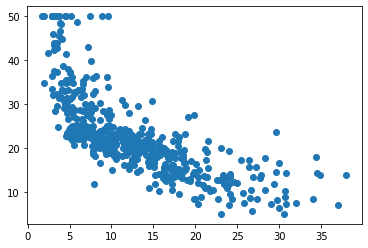

In [32]:
boston = load_boston()
plt.scatter(boston.data[:, -1], boston.target)

В pytorch есть возможность при создании тензора указывать нужно ли считать по нему градиент или нет, с помощью параметра `requires_grad`. Когда `requires_grad=True` мы сообщаем фреймворку, о том, что мы хотим следить за всеми тензорами, которые получаются из созданного. Иными словами, у любого тензора, у которого указан данный параметр, будет доступ к цепочке операций и преобразований совершенными с ними. Если эти функции дифференцируемые, то у тензора появляется параметр `.grad`, в котором хранится значение градиента.

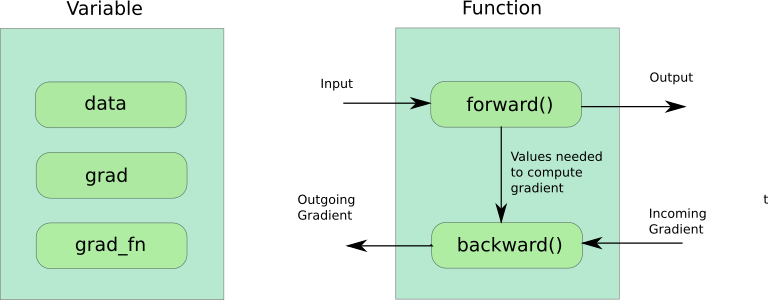

Если к результирующему тензору применить метод `.backward()`, то фреймворк посчитает по цепочке градиенту для всех тензоров, у которых `requires_grad=True`.

In [33]:
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

x = torch.tensor(boston.data[:, -1] / boston.data[:, -1].max(), dtype=torch.float32)
y = torch.tensor(boston.target, dtype=torch.float32)

assert w.grad is None # только создали тензоры и в них нет градиентов
assert b.grad is None

In [34]:
y_pred = w * x + b                 # и опять совершаем операции с тензорами
loss = torch.mean((y_pred - y)**2) # совершаем операции с тензорами
loss.backward()                    # считаем градиенты

In [35]:
assert w.grad is not None # сделали операции и посчитали градиенты, значение должно было появится
assert b.grad is not None

print("dL/dw = \n", w.grad)
print("dL/db = \n", b.grad)

dL/dw = 
 tensor([-12.2097])
dL/db = 
 tensor([-44.3208])


__Ремарка__. Для доступа к значениям в тензоре используйте атрибут `.data`:

In [36]:
w.data

tensor([0.1822])

In [37]:
from IPython.display import clear_output

for i in range(100):

    y_pred = w * x + b
    # попробуйте сделать полиномиальную регрессию в данном предсказании и посчитать градиенты после
    loss = torch.mean((y_pred - y)**2)
    loss.backward()

    # делаем шаг градиентного спуска с lr = .05
    w.data -= # YOUR CODE
    b.data -= # YOUR CODE

    # обнуляем градиенты, чтобы на следующем шаге опять посчитать и не аккумулировать их
    w.grad.data.zero_()
    b.grad.data.zero_()

    # рисуем картинки
    if (i+1) % 5 == 0:
        clear_output(True)
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.scatter(x.data.numpy(), y_pred.data.numpy(),
                    color='orange', linewidth=5)
        plt.show()

        print("loss = ", loss.data.numpy())
        if loss.data.numpy() < 0.5:
            print("Done!")
            break


SyntaxError: invalid syntax (<ipython-input-37-d8812fdfcbd3>, line 11)

### 4. Моя первая нейросеть

Для того, чтобы разобраться как обучать нейросите в pytorch, нужно освоить три вещи: 

1. Как формировать батчи и пихать их в сетку
2. Как сделать сетку
3. Как написать цикл обучения и отслеживать метрики

#### Как формировать батчи и пихать их в сетку

Чтобы в данном фреймворке иметь возможность итерироваться по данным и применять к ним преобразования, например, аугментации, о которых вы узнаете позже -- нужно создать свой класс унаследованный от `torch.utils.data.Dataset`.

Вот пример из документации:

```
class FaceLandmarksDataset(torch.utils.data.Dataset):
    """Face Landmarks dataset."""

    def __init__(self, csv_file, root_dir, transform=None):
        """
        Args:
            csv_file (string): Path to the csv file with annotations.
            root_dir (string): Directory with all the images.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.landmarks_frame = pd.read_csv(csv_file)
        self.root_dir = root_dir
        self.transform = transform

    def __len__(self):
        return len(self.landmarks_frame)

    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()

        img_name = os.path.join(self.root_dir,
                                self.landmarks_frame.iloc[idx, 0])
        image = io.imread(img_name)
        landmarks = self.landmarks_frame.iloc[idx, 1:]
        landmarks = np.array([landmarks])
        landmarks = landmarks.astype('float').reshape(-1, 2)
        sample = {'image': image, 'landmarks': landmarks}

        if self.transform:
            sample = self.transform(sample)

        return sample
```

Как вы видите, у такого класса **должно быть** два метода: 

* `__len__` -- возвращает информацию о том, сколько объектов у нас в датасете
* `__getitem__` -- возвращает семпл и таргет к нему


Теперь давайте напишем такой сами, в качестве датасета сгенерируем рандомные данные.

In [38]:
class RandomDataset(torch.utils.data.Dataset):
    """Our random dataset"""
    
    def __init__(self, x, y):
        self.x=x
        self.y=y
        
    def __len__(self):
        return len(self.x)
    
    def __getitem__(self, idx):
        return {'sample': torch.tensor(x[idx, :], dtype=torch.float), 'target': y[idx]}

In [39]:
x = np.random.rand(1000, 5)
y = np.random.rand(1000)

In [40]:
our_dataset = RandomDataset(x, y)

In [41]:
our_dataset.__getitem__(1)

{'sample': tensor([0.6426, 0.3884, 0.2340, 0.6101, 0.7978]),
 'target': 0.22420188260821106}

Для того, чтобы из данных получать батчи в pytorch используется такая сущность как даталоадер, который принимает на вход класс унаследованный от `torch.utils.data.Dataset`. Сейчас посмотрим на пример:

In [42]:
dataloader = torch.utils.data.DataLoader(our_dataset, batch_size=4)

Работают с ним следующим образом:

In [43]:
for batch in dataloader:
    batch_x = batch['sample']
    batch_y = batch['target']
    break
print('Sample:', batch_x)
print('Target:', batch_y)

Sample: tensor([[0.8251, 0.7311, 0.7354, 0.4672, 0.2126],
        [0.6426, 0.3884, 0.2340, 0.6101, 0.7978],
        [0.6707, 0.2771, 0.4671, 0.4631, 0.6454],
        [0.2433, 0.3516, 0.5667, 0.0633, 0.5913]])
Target: tensor([0.8709, 0.2242, 0.4620, 0.2500], dtype=torch.float64)


#### Как сделать сетку

Для того, чтобы в high-level pytorch создавать нейросети используется модуль `nn`. Нейросеть должна быть унаследована от класса `nn.Module`. Пример как это может выглядеть:

```
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
       x = F.relu(self.conv1(x))
       return F.relu(self.conv2(x))
```

Как мы видим на данном примере, у данного класса должно быть метод `forward`, который определяет прямой проход нейросети. Также из класса выше видно, что модуль `nn` содержит в себе реализацию большинства слоев, а модуль `nn.functional` -- функций активаций.

Есть еще один способ создать нейросеть и давайте его разберем на практике:

In [44]:
model = nn.Sequential()                 # создаем пустую модель, в которую будем добавлять слои
model.add_module('l1', nn.Linear(5, 3)) # добавили слой с 5-ю нейронами на вход и 3-мя на выход
model.add_module('l2', nn.ReLU())       # добавили функцию активации
model.add_module('l3', nn.Linear(3, 1)) # добавили слой с 3-мя нейронами на вход и 5-ю на выход

In [45]:
y_pred = model(batch_x) # получили предсказания модели

#### Как написать цикл обучения и отслеживать метрики
 
Давайте теперь соберем теперь загрузку данных, создание модели и обучим на уже созданном для нас датасете MNIST

In [46]:
mnist_train = torchvision.datasets.MNIST(
    './mnist/', train=True, download=True, 
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для тренировки
mnist_val = torchvision.datasets.MNIST(
    './mnist/', train=False, download=True,
    transform=torchvision.transforms.ToTensor()
) # используем готовый класс от торча для загрузки данных для валидации

train_dataloader = torch.utils.data.DataLoader(
    mnist_train, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

val_dataloader = torch.utils.data.DataLoader(
    mnist_val, batch_size=4, shuffle=True, num_workers=1
) # так как это уже унаследованный от Dataset класс, его можно сразу пихать в даталоадер

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw
Processing...
Done!


/home/kirill/.local/lib/python3.6/site-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


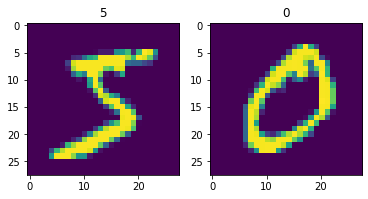

In [47]:
for i in [0, 1]:
    plt.subplot(1, 2, i + 1)
    plt.imshow(mnist_train[i][0].squeeze(0).numpy().reshape([28, 28]))
    plt.title(str(mnist_train[i][1]))
plt.show()

In [48]:
model = nn.Sequential(
    nn.Flatten(),        # превращаем картинку 28х28 в вектор размером 784
    nn.Linear(784, 128), # входной слой размером 784 нейронов с выходом в 128 нейронов
    nn.ReLU(),           # функция активации релу
    nn.Linear(128, 10),  # последний слой размером 128 нейронов с выходом 10 нейронов
    nn.Softmax(dim=-1)   # софтмакс для получения вероятностного распределения над метками класса
)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # создаем оптимизатор и передаем туда параметры модели

Веса моделей хранятся в виде матриц и выглядят так:

In [49]:
[x for x in model.named_parameters()] 

[('1.weight',
  Parameter containing:
  tensor([[-0.0069,  0.0133, -0.0343,  ..., -0.0167, -0.0028,  0.0088],
          [-0.0320, -0.0241, -0.0147,  ...,  0.0147,  0.0084,  0.0111],
          [-0.0250,  0.0332,  0.0333,  ...,  0.0197,  0.0224, -0.0088],
          ...,
          [ 0.0293,  0.0057, -0.0158,  ...,  0.0276,  0.0231,  0.0222],
          [ 0.0034,  0.0134,  0.0020,  ..., -0.0221,  0.0172,  0.0080],
          [ 0.0193, -0.0318, -0.0107,  ..., -0.0095, -0.0065,  0.0046]],
         requires_grad=True)),
 ('1.bias',
  Parameter containing:
  tensor([-0.0325,  0.0033,  0.0138,  0.0024, -0.0237, -0.0315, -0.0356,  0.0082,
           0.0099, -0.0189, -0.0258,  0.0267,  0.0101, -0.0054, -0.0347,  0.0037,
           0.0100, -0.0342,  0.0196,  0.0285, -0.0332,  0.0003,  0.0244,  0.0264,
           0.0224,  0.0081, -0.0004,  0.0116,  0.0119,  0.0070,  0.0133,  0.0090,
          -0.0307, -0.0278, -0.0060, -0.0099,  0.0328, -0.0183, -0.0343,  0.0262,
           0.0247, -0.0273,  0.0113, 

Чтобы красиво трекать метрики надо завести wandb. Пишем для этого всего пару строк:

In [55]:
wandb.init(project="pytorch-demo")  # инициализируем проект
wandb.watch(model)                  # сохраняем параметры сетки в wandb + просим следить за градиентами сетки
print()

_runtime,21
_timestamp,1631562838
_step,0


_runtime,▁
_timestamp,▁
_step,▁


Можно перейти по ссылке и следить за нашей моделью прямо во время обучения!

In [56]:
for epoch in range(11): # всего у нас будет 10 эпох (10 раз подряд пройдемся по всем батчам из трейна)
    for x_train, y_train in tqdm(train_dataloader): # берем батч из трейн лоадера
        y_pred = model(x_train)                       # делаем предсказания
        loss = F.cross_entropy(y_pred, y_train)       # считаем лосс
        loss.backward()                               # считаем градиенты обратным проходом
        optimizer.step()                              # обновляем параметры сети
        optimizer.zero_grad()                         # обнуляем посчитанные градиенты параметров
    
    if epoch % 2 == 0:
        val_loss = []      # сюда будем складывать **средний по бачу** лосс
        val_accuracy = []
        with torch.no_grad(): # мы считаем качество, поэтому мы запрещаем фреймворку считать градиенты по параметрам
            for x_val, y_val in tqdm(val_dataloader):       # берем батч из вал лоадера
                y_pred = model(x_val)                       # делаем предсказания
                loss = F.cross_entropy(y_pred, y_val)       # считаем лосс
                val_loss.append(loss.numpy())               # добавляем в массив 
                val_accuracy.extend((torch.argmax(y_pred, dim=-1) == y_val).numpy().tolist())
          
        # скидываем метрики на wandb и автоматом смотрим на графики
        wandb.log({"mean val loss": np.mean(val_loss),
                   "mean val accuracy": np.mean(val_accuracy)})
        # печатаем метрики
        print('Epoch: {epoch}, loss: {loss}, accuracy: {accuracy}'.format(
                epoch=epoch, loss=np.mean(val_loss), accuracy=np.mean(val_accuracy)
        ))

Traceback (most recent call last):
  File "/usr/lib/python3.6/multiprocessing/queues.py", line 240, in _feed
    send_bytes(obj)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 404, in _send_bytes
    self._send(header + buf)
  File "/usr/lib/python3.6/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

### Дополнительные материалы:

* [PyTroch на простейшем примере с пояснениями](https://github.com/Kaixhin/grokking-pytorch)
* [Хорошая книга про pytorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)
* [Использование pytorch на GPU](https://pytorch.org/docs/master/notes/cuda.html)
* [Pytorch за 60 минут](http://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
* [Как устроено автоматическое дифференцирование в pytorch](http://videolectures.net/site/normal_dl/tag=1129745/deeplearning2017_johnson_automatic_differentiation_01.pdf)